In [2]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import pandas as pd
import os 
from time import time
from time import sleep
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'

parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '7bfa9617-3516-4419-a57c-96641028a49b',
}

# url = 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
# parameters = {
#   'start':'1',
#   'limit':'5000',
#   'convert':'USD'
# }
# headers = {
#   'Accepts': 'application/json',
#   'X-CMC_PRO_API_KEY': 'b54bcf4d-1bca-4e8e-9a24-22ff2c3d462c',
# }

session = Session()
session.headers.update(headers)

try:
    response = session.get(url, params = parameters)
    data = json.loads(response.text)
    print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
    print(e)


{'status': {'timestamp': '2024-01-27T20:15:33.187Z', 'error_code': 0, 'error_message': None, 'elapsed': 18, 'credit_count': 1, 'notice': None, 'total_count': 8800}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10792, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [4]:
type(data)

dict

In [17]:
#This allows you to see all the columns, not just like 15

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [19]:
#This normalizes the data and makes it all pretty in a dataframe
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10792,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.961056e+07,1.961056e+07,False,NaN,1,NaN,NaN,None,2024-01-27T20:15:00.000Z,41948.410137,1.243466e+10,-50.3651,0.235175,-0.601305,0.578778,-1.199889,9.830351,21.191724,8.226316e+11,50.7752,8.809166e+11,None,2024-01-27T20:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-27 15:20:29.469362
1,1027,Ethereum,ETH,ethereum,8335,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201803e+08,1.201803e+08,True,NaN,2,NaN,NaN,None,2024-01-27T20:15:00.000Z,2271.562107,5.353643e+09,-47.4402,0.000274,0.456471,-7.905465,-3.467163,10.168427,26.520267,2.729970e+11,16.8502,2.729970e+11,None,2024-01-27T20:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-27 15:20:29.469362
2,825,Tether USDt,USDT,tether,73208,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,9.603675e+10,9.860077e+10,True,NaN,3,NaN,NaN,None,2024-01-27T20:14:00.000Z,1.000090,2.507690e+10,-38.4428,0.016593,0.026061,-0.035091,-0.048667,-0.015144,-0.038291,9.604538e+10,5.9282,9.860963e+10,None,2024-01-27T20:14:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-01-27 15:20:29.469362
3,1839,BNB,BNB,bnb,2038,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.495476e+08,1.495476e+08,False,NaN,4,NaN,NaN,None,2024-01-27T20:14:00.000Z,305.845532,6.824462e+08,-30.3244,0.136438,1.233664,-2.963722,-6.674880,32.640832,34.725381,4.573847e+10,2.8231,4.573847e+10,None,2024-01-27T20:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-27 15:20:29.469362
4,5426,Solana,SOL,solana,618,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.332590e+08,5.680547e+08,True,NaN,5,NaN,NaN,None,2024-01-27T20:15:00.000Z,93.036697,1.269426e+09,-35.1078,-0.097095,-0.479835,0.751953,-6.950703,60.504078,181.630579,4.030899e+10,2.4883,5.284993e+10,None,2024-01-27T20:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-27 15:20:29.469362
5,52,XRP,XRP,xrp,1217,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.437451e+10,9.998796e+10,False,NaN,6,NaN,NaN,None,2024-01-27T20:15:00.000Z,0.530120,5.410324e+08,-45.7183,0.066599,-0.550849,-3.307217,-15.797262,-13.404842,-5.121639,2.882503e+10,1.7792,5.301202e+10,None,2024-01-27T20:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-27 15:20:29.469362
6,3408,USDC,USDC,usd-coin,16415,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.611214e+10,2.611214e+10,False,NaN,7,NaN,NaN,None,2024-01-27T20:15:00.000Z,1.000182,3.090394e+09,-42.4650,0.010352,0.014580,-0.099673,-0.001620,0.043835,0.002644,2.611690e+10,1.6120,2.611690e+10,None,2024-01-27T20:15:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-01-27 15:20:29.469362
7,2010,Cardano,ADA,cardano,1040,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.541400e+10,3.657136e+10,False,NaN,8,NaN,NaN,None,2024-01-27T20:14:00.000Z,0.487784,2.562199e+08,-27.0818,0.380770,0.718741,-4.560469,-21.459822,25.959084,64.432624,1.727438e+10,1.0662,2.195028e+10,None,2024-01-27T20:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-27 15:20:29.469362
8,5805,Avalanche,AVAX,avalanche,649,2020-07-13T00:00:00.000Z,"[defi, smart-contracts, three-arrows-capital-p

In [52]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'

    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '7bfa9617-3516-4419-a57c-96641028a49b',
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params = parameters)
        data = json.loads(response.text)
#         print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)

#This normalizes the data and makes it all pretty in a dataframe
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df_append = pd.DataFrame(df2)
    df = pd.concat([df, df_append])
    
    
    # Use this if you want to create a csv and append data to it
#     df = pd.json_normalize(data['data'])
#     df['timestamp'] = pd.to_datetime('now')
#     df

#     if not os.path.isfile(r'C:\Users\Mohammed\OneDrive\Desktop\SQL-Folders\Data_Analyst\Python_tutorials\API.csv'):
#         df.to_csv(r'C:\Users\Mohammed\OneDrive\Desktop\SQL-Folders\Data_Analyst\Python_tutorials\API.csv', header='column_names')
#     else:
#         df.to_csv(r'C:\Users\Mohammed\OneDrive\Desktop\SQL-Folders\Data_Analyst\Python_tutorials\API.csv', mode='a', header=False)
    

In [99]:
for i in range(333):
    api_runner()
    print("API Runner successfuly completed")
    sleep(3)
exit()

API Runner successfuly completed
API Runner successfuly completed
API Runner successfuly completed
API Runner successfuly completed
API Runner successfuly completed
API Runner successfuly completed
API Runner successfuly completed


KeyboardInterrupt: 

In [54]:
df3 = pd.read_csv(r'C:\Users\Mohammed\OneDrive\Desktop\SQL-Folders\Data_Analyst\Python_tutorials\API.csv')
df3

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10792,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.961056e+07,1.961056e+07,False,NaN,1,NaN,NaN,NaN,2024-01-27T21:14:00.000Z,42033.563001,1.177325e+10,-53.1941,0.200113,0.299927,0.582523,-1.352427,10.198532,21.336330,8.243015e+11,50.8457,8.827048e+11,NaN,2024-01-27T21:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-27 16:15:26.827921
1,1,1027,Ethereum,ETH,ethereum,8335,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.201803e+08,1.201803e+08,True,NaN,2,NaN,NaN,NaN,2024-01-27T21:14:00.000Z,2268.608022,5.195897e+09,-48.0116,-0.127999,0.608044,-8.079322,-3.895794,10.040875,25.798676,2.726420e+11,16.8175,2.726420e+11,NaN,2024-01-27T21:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-27 16:15:26.827921
2,2,825,Tether USDt,USDT,tether,73209,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,9.603675e+10,9.860077e+10,True,NaN,3,NaN,NaN,NaN,2024-01-27T21:13:00.000Z,1.000130,2.423050e+10,-40.7655,0.004165,0.034843,0.082393,-0.033955,-0.029255,-0.033250,9.604921e+10,5.9246,9.861357e+10,NaN,2024-01-27T21:13:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-01-27 16:15:26.827921
3,3,1839,BNB,BNB,bnb,2038,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.495476e+08,1.495476e+08,False,NaN,4,NaN,NaN,NaN,2024-01-27T21:13:00.000Z,305.784338,6.865077e+08,-29.2287,-0.013945,1.491661,-3.221036,-6.270644,32.337869,34.470331,4.572932e+10,2.8207,4.572932e+10,NaN,2024-01-27T21:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-27 16:15:26.827921
4,4,5426,Solana,SOL,solana,618,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.332590e+08,5.680547e+08,True,NaN,5,NaN,NaN,NaN,2024-01-27T21:14:00.000Z,93.120301,1.213514e+09,-38.9463,0.096391,1.352862,-0.000237,-7.972940,59.496814,183.394416,4.034521e+10,2.4887,5.289742e+10,NaN,2024-01-27T21:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-27 16:15:26.827921
5,5,52,XRP,XRP,xrp,1217,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.437451e+10,9.998796e+10,False,NaN,6,NaN,NaN,NaN,2024-01-27T21:14:00.000Z,0.529961,5.163168e+08,-48.5613,-0.030154,0.045247,-3.610864,-16.216716,-13.468233,-5.171760,2.881639e+10,1.7775,5.299614e+10,NaN,2024-01-27T21:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-27 16:15:26.827921
6,6,3408,USDC,USDC,usd-coin,16415,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,2.611214e+10,2.611214e+10,False,NaN,7,NaN,NaN,NaN,2024-01-27T21:14:00.000Z,1.000011,2.927220e+09,-45.5426,-0.024315,-0.009776,-0.003960,-0.026680,0.017437,-0.023145,2.611243e+10,1.6105,2.611243e+10,NaN,2024-01-27T21:14:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-01-27 16:15:26.827921
7,7,2010,Cardano,ADA,cardano,1040,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.541400e+10,3.657136e+10,False,NaN,8,NaN,NaN,NaN,2024-01-27T21:13:00.000Z,0.488889,2.452894e+08,-31.3386,0.215794,1.594926,-5.117022,-21.501430,26.268314,64.557198,1.731351e+10,1.0680,2.199999e+10,NaN,2024-01-27T21:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-27 16:15:26.827921
8,8,5805,Avalanche,AVAX,avalanche,649,2020-07-13T00:00:00.000Z,"['defi', 'smart-contracts', 't

In [103]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10792,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19610556.00000,19610556.00000,False,NaN,1,NaN,NaN,None,2024-01-27T22:10:00.000Z,42090.10159,11617389337.25167,-54.07770,0.13103,0.41500,0.87973,-1.07850,10.84996,21.87266,825410294214.98743,50.81340,883892133324.25000,None,2024-01-27T22:10:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-27 17:11:23.965770
1,1027,Ethereum,ETH,ethereum,8335,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120180302.95516,120180302.95516,True,NaN,2,NaN,NaN,None,2024-01-27T22:10:00.000Z,2267.36973,5167850818.98069,-47.98490,-0.08003,0.36206,-8.09702,-3.30346,10.36724,26.11197,272493180814.40033,16.77510,272493180814.39999,None,2024-01-27T22:10:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-27 17:11:23.965770
2,825,Tether USDt,USDT,tether,73209,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,96036749591.53659,98600769239.51694,True,NaN,3,NaN,NaN,None,2024-01-27T22:09:00.000Z,1.00018,23883417415.52813,-42.04490,0.00288,0.01493,0.08786,-0.04633,-0.00738,-0.02808,96054075395.46126,5.91320,98618557613.25999,None,2024-01-27T22:09:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-01-27 17:11:23.965770
3,1839,BNB,BNB,bnb,2038,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,149547628.74286,149547628.74286,False,NaN,4,NaN,NaN,None,2024-01-27T22:09:00.000Z,305.64237,688746070.57812,-28.77940,-0.09311,1.24396,-3.38617,-5.74895,32.81963,34.32465,45708092057.01856,2.81390,45708092057.02000,None,2024-01-27T22:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-27 17:11:23.965770
4,5426,Solana,SOL,solana,618,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,433259022.36396,568054660.28355,True,NaN,5,NaN,NaN,None,2024-01-27T22:10:00.000Z,93.39621,1215065593.27209,-39.24140,0.25810,1.41280,0.41704,-7.71235,60.66892,185.67889,40464752275.20064,2.49110,53054154491.07000,None,2024-01-27T22:10:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-27 17:11:23.965770
5,52,XRP,XRP,xrp,1217,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,54374512255.00000,99987956150.00000,False,NaN,6,NaN,NaN,None,2024-01-27T22:10:00.000Z,0.53149,497074390.04751,-50.35860,0.27475,-0.20078,-3.17575,-15.68254,-13.17275,-4.47302,28899489305.25648,1.77910,53148962826.05000,None,2024-01-27T22:10:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-27 17:11:23.965770
6,3408,USDC,USDC,usd-coin,16418,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,26112142636.16491,26112142636.16491,False,NaN,7,NaN,NaN,None,2024-01-27T22:10:00.000Z,1.00029,2863149234.84056,-47.15770,0.01183,-0.00100,0.02647,0.00754,0.05934,0.01490,26119640879.14316,1.60800,26119640879.14000,None,2024-01-27T22:10:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-01-27 17:11:23.965770
7,2010,Cardano,ADA,cardano,1040,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35413999807.56500,36571363488.23100,False,NaN,8,NaN,NaN,None,2024-01-27T22:09:00.000Z,0.48894,243676508.95020,-32.33970,0.01495,1.22571,-4.93609,-20.85998,26.75815,64.91854,17315240162.99543,1.06600,22002197197.97000,None,2024-01-27T22:09:00.000Z

In [101]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)


In [102]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10792,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19610556.00000,19610556.00000,False,NaN,1,NaN,NaN,None,2024-01-27T22:10:00.000Z,42090.10159,11617389337.25167,-54.07770,0.13103,0.41500,0.87973,-1.07850,10.84996,21.87266,825410294214.98743,50.81340,883892133324.25000,None,2024-01-27T22:10:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-27 17:11:23.965770
1,1027,Ethereum,ETH,ethereum,8335,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120180302.95516,120180302.95516,True,NaN,2,NaN,NaN,None,2024-01-27T22:10:00.000Z,2267.36973,5167850818.98069,-47.98490,-0.08003,0.36206,-8.09702,-3.30346,10.36724,26.11197,272493180814.40033,16.77510,272493180814.39999,None,2024-01-27T22:10:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-27 17:11:23.965770
2,825,Tether USDt,USDT,tether,73209,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,96036749591.53659,98600769239.51694,True,NaN,3,NaN,NaN,None,2024-01-27T22:09:00.000Z,1.00018,23883417415.52813,-42.04490,0.00288,0.01493,0.08786,-0.04633,-0.00738,-0.02808,96054075395.46126,5.91320,98618557613.25999,None,2024-01-27T22:09:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-01-27 17:11:23.965770
3,1839,BNB,BNB,bnb,2038,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,149547628.74286,149547628.74286,False,NaN,4,NaN,NaN,None,2024-01-27T22:09:00.000Z,305.64237,688746070.57812,-28.77940,-0.09311,1.24396,-3.38617,-5.74895,32.81963,34.32465,45708092057.01856,2.81390,45708092057.02000,None,2024-01-27T22:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-27 17:11:23.965770
4,5426,Solana,SOL,solana,618,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,433259022.36396,568054660.28355,True,NaN,5,NaN,NaN,None,2024-01-27T22:10:00.000Z,93.39621,1215065593.27209,-39.24140,0.25810,1.41280,0.41704,-7.71235,60.66892,185.67889,40464752275.20064,2.49110,53054154491.07000,None,2024-01-27T22:10:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-27 17:11:23.965770
5,52,XRP,XRP,xrp,1217,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,54374512255.00000,99987956150.00000,False,NaN,6,NaN,NaN,None,2024-01-27T22:10:00.000Z,0.53149,497074390.04751,-50.35860,0.27475,-0.20078,-3.17575,-15.68254,-13.17275,-4.47302,28899489305.25648,1.77910,53148962826.05000,None,2024-01-27T22:10:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-27 17:11:23.965770
6,3408,USDC,USDC,usd-coin,16418,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,26112142636.16491,26112142636.16491,False,NaN,7,NaN,NaN,None,2024-01-27T22:10:00.000Z,1.00029,2863149234.84056,-47.15770,0.01183,-0.00100,0.02647,0.00754,0.05934,0.01490,26119640879.14316,1.60800,26119640879.14000,None,2024-01-27T22:10:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-01-27 17:11:23.965770
7,2010,Cardano,ADA,cardano,1040,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35413999807.56500,36571363488.23100,False,NaN,8,NaN,NaN,None,2024-01-27T22:09:00.000Z,0.48894,243676508.95020,-32.33970,0.01495,1.22571,-4.93609,-20.85998,26.75815,64.91854,17315240162.99543,1.06600,22002197197.97000,None,2024-01-27T22:09:00.000Z

In [105]:
# Now let's look at the coin trends over time

df4 = df.groupby('name', sort = False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean(1)
df4

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.13103,0.41500,0.87973,-1.07850,10.84996,21.87266
Ethereum,-0.08003,0.36206,-8.09702,-3.30346,10.36724,26.11197
Tether USDt,0.00288,0.01493,0.08786,-0.04633,-0.00738,-0.02808
BNB,-0.09311,1.24396,-3.38617,-5.74895,32.81963,34.32465
Solana,0.25810,1.41280,0.41704,-7.71235,60.66892,185.67889
XRP,0.27475,-0.20078,-3.17575,-15.68254,-13.17275,-4.47302
USDC,0.01183,-0.00100,0.02647,0.00754,0.05934,0.01490
Cardano,0.01495,1.22571,-4.93609,-20.85998,26.75815,64.91854
Avalanche,0.44195,2.26597,0.97210,-17.50148,59.91096,192.64527


In [106]:
df5 = df4.stack()
df5

name                                     
Bitcoin      quote.USD.percent_change_1h      0.13103
             quote.USD.percent_change_24h     0.41500
             quote.USD.percent_change_7d      0.87973
             quote.USD.percent_change_30d    -1.07850
             quote.USD.percent_change_60d    10.84996
             quote.USD.percent_change_90d    21.87266
Ethereum     quote.USD.percent_change_1h     -0.08003
             quote.USD.percent_change_24h     0.36206
             quote.USD.percent_change_7d     -8.09702
             quote.USD.percent_change_30d    -3.30346
             quote.USD.percent_change_60d    10.36724
             quote.USD.percent_change_90d    26.11197
Tether USDt  quote.USD.percent_change_1h      0.00288
             quote.USD.percent_change_24h     0.01493
             quote.USD.percent_change_7d      0.08786
             quote.USD.percent_change_30d    -0.04633
             quote.USD.percent_change_60d    -0.00738
             quote.USD.percent_change_90

In [61]:
type(df4)

pandas.core.frame.DataFrame

In [63]:
type(df5)

pandas.core.series.Series

In [66]:
df6 = df5.to_frame(name='values')
df6

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.20401
            quote.USD.percent_change_24h   0.30334
            quote.USD.percent_change_7d    0.56846
            quote.USD.percent_change_30d  -1.33279
            quote.USD.percent_change_60d  10.20127
            quote.USD.percent_change_90d  21.37540
Ethereum    quote.USD.percent_change_1h   -0.12703
            quote.USD.percent_change_24h   0.63990
            quote.USD.percent_change_7d   -8.10382
            quote.USD.percent_change_30d  -3.88227
            quote.USD.percent_change_60d  10.06296
            quote.USD.percent_change_90d  25.77922
Tether USDt quote.USD.percent_change_1h    0.00201
            quote.USD.percent_change_24h   0.03876
            quote.USD.percent_change_7d    0.07873
            quote.USD.percent_change_30d  -0.03823
            quote.USD.percent_change_60d  -0.01807
            quote.USD.percent_change_90d  -0.02344
BNB         quote.USD.percent_change_1h   -0.03845
            quote.USD.percent_change_24h   1.47721
            quote.USD.percent_change_7d   -3.19490
            quote.USD.percent_change_30d  -6.27478
            quote.USD.percent_change_60d  32.34259
            quote.USD.percent_change_90d  34.43147
Solana      quote.USD.percent_change_1h    0.11691
            quote.USD.percent_change_24h   1.37818
            quote.USD.percent_change_7d   -0.13354
            quote.USD.percent_change_30d  -7.74976
            quote.USD.percent_change_60d  59.48984
            quote.USD.percent_change_90d 183.23077
XRP         quote.USD.percent_change_1h   -0.02797
            quote.USD.percent_change_24h   0.05839
            quote.USD.percent_change_7d   -3.60143
            quote.USD.percent_change_30d -16.16629
            quote.USD.percent_change_60d -13.44291
            quote.USD.percent_change_90d  -5.17871
USDC        quote.USD.percent_change_1h    0.00937
            quote.USD.percent_change_24h   0.01819
            quote.USD.percent_change_7d    0.02139
            quote.USD.percent_change_30d  -0.02826
            quote.USD.percent_change_60d   0.04425
            quote.USD.percent_change_90d   0.02139
Cardano     quote.USD.percent_change_1h    0.23984
            quote.USD.percent_change_24h   1.60387
            quote.USD.percent_change_7d   -5.09368
            quote.USD.percent_change_30d -21.51789
            quote.USD.percent_change_60d  26.28941
            quote.USD.percent_change_90d  64.62762
Avalanche   quote.USD.percent_change_1h    0.18975
            quote.USD.percent_change_24h   1.99408
            quote.USD.percent_change_7d    0.09041
            quote.USD.percent_change_30d -17.93509
            quote.USD.percent_change_60d  58.37404
            quote.USD.percent_change_90d 190.25826
Dogecoin    quote.USD.percent_change_1h   -0.17969
            quote.USD.percent_change_24h   0.39342
            quote.USD.percent_change_7d   -6.18475
            quote.USD.percent_change_30d -12.99076
            quote.USD.percent_change_60d  -0.91697
            quote.USD.percent_change_90d  14.41791
TRON        quote.USD.percent_change_1h    0.03109
            quote.USD.percent_change_24h  -1.65612
            quote.USD.percent_change_7d    2.15433
            quote.USD.percent_change_30d   6.72579
            quote.USD.percent_change_60d   8.69152
            quote.USD.percent_change_90d  18.35570
Polkadot    quote.USD.percent_change_1h    0.40997
            quote.USD.percent_change_24h   0.83266
            quote.USD.percent_change_7d   -2.77851
            quote.USD.percent_change_30d -20.66858
            quote.USD.percent_change_60d  26.65213
            quote.USD.percent_change_90d  55.42972
Chainlink   quote.USD.percent_change_1h   -0.07804
            quote.USD.percent_change_24h   1.98353
            quote.USD.percent_change_7d   -8.79415
            quote.USD.percent_change_30d -13.00055
            quote.USD.percent_change_60d  -2.00281
            quo

In [67]:
df6.count()

values    90
dtype: int64

In [71]:
#Because of how it's structured above we need to set an index. I don't want to pass a column as an index for this dataframe
#So I'm going to create a range and pass that as the dataframe. You can make this more dynamic, but I'm just going to hard code it

index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# using set_index() function
df7 = df6.reset_index()
df7


# If it only has the index and values try doing reset_index like "df5.reset_index()"

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.20401
1,Bitcoin,quote.USD.percent_change_24h,0.30334
2,Bitcoin,quote.USD.percent_change_7d,0.56846
3,Bitcoin,quote.USD.percent_change_30d,-1.33279
4,Bitcoin,quote.USD.percent_change_60d,10.20127
5,Bitcoin,quote.USD.percent_change_90d,21.37540
6,Ethereum,quote.USD.percent_change_1h,-0.12703
7,Ethereum,quote.USD.percent_change_24h,0.63990
8,Ethereum,quote.USD.percent_change_7d,-8.10382
9,Ethereum,quote.USD.percent_change_30d,-3.88227


In [88]:
df8 = df7.rename(columns = {'level_1': 'percent_change'})
df8

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.20401
1,Bitcoin,quote.USD.percent_change_24h,0.30334
2,Bitcoin,quote.USD.percent_change_7d,0.56846
3,Bitcoin,quote.USD.percent_change_30d,-1.33279
4,Bitcoin,quote.USD.percent_change_60d,10.20127
5,Bitcoin,quote.USD.percent_change_90d,21.37540
6,Ethereum,quote.USD.percent_change_1h,-0.12703
7,Ethereum,quote.USD.percent_change_24h,0.63990
8,Ethereum,quote.USD.percent_change_7d,-8.10382
9,Ethereum,quote.USD.percent_change_30d,-3.88227


In [93]:
df8['percent_change'] = df8['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])
# df8['percent_change'] = df8['percent_change'].replace(['quote.USD.percent_change_1h'],['1h'])

df8

,name,percent_change,values
0,Bitcoin,1h,0.20401
1,Bitcoin,24h,0.30334
2,Bitcoin,7d,0.56846
3,Bitcoin,30d,-1.33279
4,Bitcoin,60d,10.20127
5,Bitcoin,90d,21.37540
6,Ethereum,1h,-0.12703
7,Ethereum,24h,0.63990
8,Ethereum,7d,-8.10382
9,Ethereum,30d,-3.88227


C:\Users\Mohammed\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


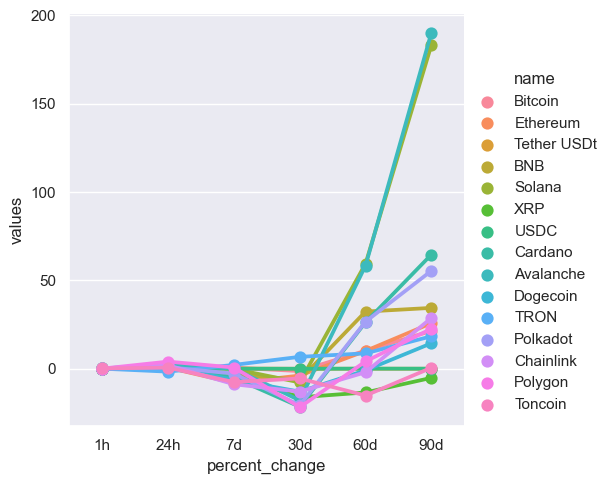

In [110]:
# Set the figure size
# plt.figure(figsize=(10, 10))

sns.catplot(x = 'percent_change', y = 'values', hue = 'name', data = df8, kind = 'point')

# Show the plot
# plt.show()

In [113]:
# Now to do something much simpler
# we are going to create a dataframe with the columns we want

# df9 = df[['name','quote.USD.price','timestamp']]

df9 = df8[['name','percent_change','values']]

df9 = df9.query("name == 'Bitcoin'")
df9

,name,percent_change,values
0,Bitcoin,1h,0.20401
1,Bitcoin,24h,0.30334
2,Bitcoin,7d,0.56846
3,Bitcoin,30d,-1.33279
4,Bitcoin,60d,10.20127
5,Bitcoin,90d,21.37540


<Axes: xlabel='percent_change', ylabel='values'>

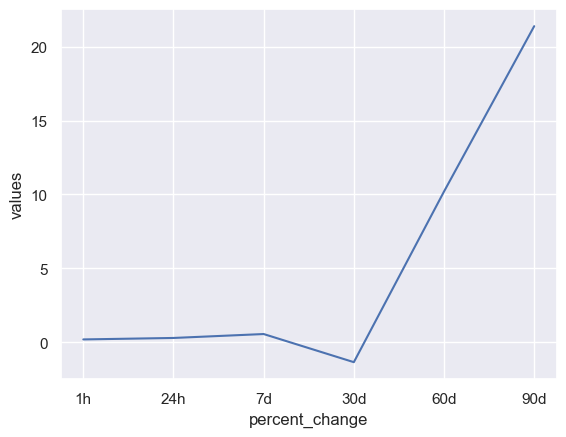

In [116]:
sns.set_theme(style="darkgrid")

# sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)

sns.lineplot(x='percent_change', y='values', data = df9)